## Lab 8:  Clustering
Environmental justice (EJ) seeks to ensure that all communities, regardless of socioeconomic status or demographic background, have equal access to clean air, water, and, in the form of energy justice, access to renewable energy resources while minimizing exposure to environmental hazards. In this lab, we will apply clustering analysis to explore how U.S. counties group together based on renewable energy potential, demographic characteristics, and environmental risk factors.

The EEIP dataset was collated by the National Renewable Energy Lab (NREL) and contains a large set of features from multiple other databases including SLOPE (renewable energy potential) and EJSCREEN (environmental risk indicators).

Link to metadata: https://ucsb.box.com/s/x3olvh3rd8w5h7xz8jnm3v8g3t4ajjsg

First you will step through a guided clustering exploration of renewable energy production potential.  Then you will formulate a question of your own that brings in an environmental justice component.


### Step 0: Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load the EEIP dataset 
eeip_data = pd.read_csv("/courses/EDS232/Data/eeip.data.csv")

## Part I:
In this part, we will step through an analysis that examines how US counties cluster in their potential production of renewable energy.  

### Step 1: Exploratory Data Analysis

First we need to check for missing data and remove incomplete rows. Since clustering is a distance-based technique, we also need to ensure that the features used for clustering are scaled appropriately to prevent dominant features from skewing results.  For our first analysis, use the following variables from the SLOPE dataset related to energy production potential as your features: 
- `utility_pv_technical_generation_potential_mwh`
- `residential_pv_technical_generation_potential_mwh`
- `land_based_wind_technical_generation_potential_mwh`
- `commercial_pv_technical_generation_potential_mwh`

*Information on these variables is available on line 7 of the ColumnsExplained tab of the metadata*

Once you have removed incomplete rows and scaled, print the shape of your processed dataframe. 

In [2]:
# variables
columns_of_interest = [
    'utility_pv_technical_generation_potential_mwh',
    'residential_pv_technical_generation_potential_mwh',
    'land_based_wind_technical_generation_potential_mwh',
    'commercial_pv_technical_generation_potential_mwh'
]

# Check for NAs
filtered_data = eeip_data[columns_of_interest].dropna()
# Scale 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(filtered_data)

# Convert the scaled data back to a DataFrame
processed_data = pd.DataFrame(scaled_features, columns=columns_of_interest)

# Print the shape of the processed DataFrame
print("Shape of processed DataFrame:", processed_data.shape)

Shape of processed DataFrame: (3107, 4)


### Step 2: Hierarchical Clustering Analysis

Now that we have preprocessed our dataset and standardized the energy potential features, we will use hierarchical clustering to explore how counties group together based on their energy potential.

A dendrogram is a tree-like visualization that shows how clusters are merged step by step. By analyzing the dendrogram, we can decide the optimal number of clusters by looking at the distance between merges.

Use `linkage()` to perform the clustering.  Use 'ward' for the `method` parameter, a method which minimizes the variance within clusters, producing well-balanced groups. We will first visualize the **full dendrogram** using `dendrogram` before deciding on a truncation strategy.


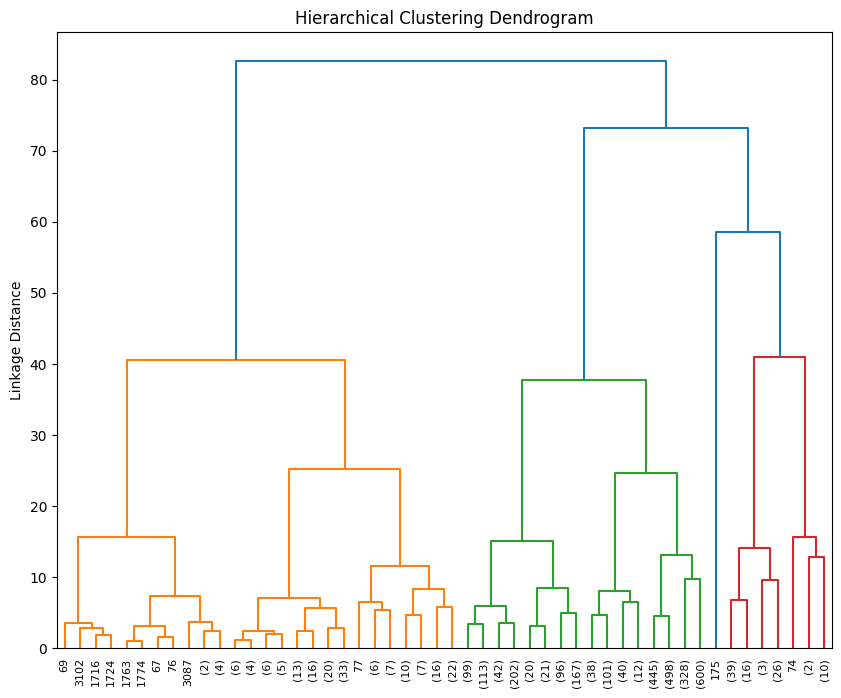

In [3]:
# linkage with ward method
linkage_cluster = linkage(processed_data, method = 'ward')

# fulldendrogram
plt.figure(figsize=(10, 8))
dendrogram(linkage_cluster, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.ylabel("Linkage Distance")
plt.xlabel("")
plt.show()

### Step 3: Set Up Cluster Interpretation

After determining the optimal number of clusters from the dendrogram, we now assign each county to a cluster using the extracted cluster labels.

To better understand the clustering results, we will:
- Define `num_clusters` as the ideal number of clusters based on the dendrogram created above
- Extract cluster assignment attribute from the hierarchical clustering using `fcluster()` with `criterion = "maxclust"`
- Create a new variable `Cluster` in your cleaned dataframe and assign cluster labels to it
- Compute and print the mean values of the original energy potential features for each cluster.

This summary will help us interpret how counties differ in energy potential across clusters and inform possible next steps for analysis.


In [4]:
# ideal num of clusters
num_clusters = 4 

# extract cluster atributes
cluster_labels = fcluster(linkage_cluster, num_clusters, criterion="maxclust")

# create a new variable assign cluster labels to new variable
processed_data["cluster"] = cluster_labels

# calculate mean values
cluster_summary = processed_data.groupby("cluster").mean()

# print results
print(cluster_summary)

         utility_pv_technical_generation_potential_mwh  \
cluster                                                  
1                                             2.831068   
2                                            -0.184742   
3                                            -0.076363   
4                                            -0.661236   

         residential_pv_technical_generation_potential_mwh  \
cluster                                                      
1                                                -0.193351   
2                                                -0.121549   
3                                                 3.631745   
4                                                26.888227   

         land_based_wind_technical_generation_potential_mwh  \
cluster                                                       
1                                                 3.004580    
2                                                -0.185776    
3                         

### Step 4: Visualizing Energy Potential Across Clusters
Now that we have assigned cluster labels, we want to understand how energy potential differs across clusters. To do this, we will visualize these differences using a grouped bar chart.

Each bar should represent the mean value of an energy potential indicator for a specific cluster. These different patterns of potential is what caused the model to segregate the clusters in the way that it did.

<Figure size 1000x800 with 0 Axes>

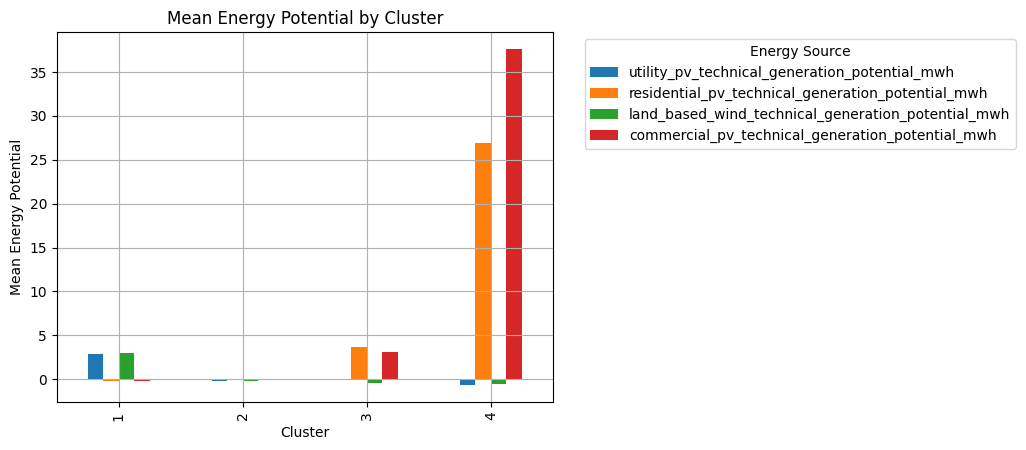

In [5]:
# mean values
cluster_summary = processed_data.groupby("cluster").mean()

# bar chart
plt.figure(figsize=(10, 8))
cluster_summary.plot(kind = 'bar')
plt.title("Mean Energy Potential by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Energy Potential")
plt.legend(title = "Energy Source", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()
plt.show()

### Step 5: Interpret Clustering Results
Interpret your plot of the resulting clusters.  How would you characterize and compare the four different clusters in terms of their profile of energy generation?

Cluster four definitely seems to have the most energy, with commercial and residential significantly higher than utility and land based wind generation potential. Cluster three appears to be the next highest, also with higher residential and commercial (although significantly lower than cluster 4). Cluster one has a higher utility and land based wind potential (although still signficantly lower than other values in cluster 4). Cluster two seems to be extremely near 0 for all variables. Cluster four has the most energy generation potential and cluster one has the least. 

## Part II: Environmental Justice Metrics
Now it's your turn.

So far, we have clustered counties based on **energy potential**, but energy potential alone does not tell the full story of **energy equity and access**. To deepen the analysis, we need to consider environmental justice (EJ) factors that affect communities’ ability to benefit from renewable energy and the environmental burdens they already experience.

1. Explore EJSCREEN variables:  
   - The EJSCREEN subset of our dataset contains metrics on pollution burden, demographics (population size), and health risks (*lines 31-41 of the ColumnsExplained tab in the metadata sheet linked above*).
   - Identify 1-3 variables that could be important for energy equity analysis.  You could introduce them either as clustering features, as post-clustering variables to help interpret the clusters, or both. 

2. Modify the clustering approach:  
   - Add your selected EJSCREEN variables to our feature set.    
   - Re-run the hierarchical clustering analysis with the expanded dataset (if you added any as clustering features).  

3. Interpret the Results:
   Your interpretation could include considerations such as:
   - How do clusters change when EJSCREEN variables are included?  
   - Are counties with high renewable energy potential also burdened by environmental risks?  
   - What policy recommendations might emerge from these findings?  

In [6]:
# Select low income indicator
eeip_ej = eeip_data[["lowincome_indicator"]].dropna().reset_index(drop=True)

# Combine the EJSCREEN columns with the scaled data
ej_df = pd.concat([eeip_ej, processed_data], axis=1)
ej_df.head()

ej_means = ej_df.groupby(['cluster']).mean()
print(ej_means)

         lowincome_indicator  utility_pv_technical_generation_potential_mwh  \
cluster                                                                       
1.0                 0.227411                                       2.831068   
2.0                 0.214605                                      -0.184742   
3.0                 0.094730                                      -0.076363   
4.0                 0.048716                                      -0.661236   

         residential_pv_technical_generation_potential_mwh  \
cluster                                                      
1.0                                              -0.193351   
2.0                                              -0.121549   
3.0                                               3.631745   
4.0                                              26.888227   

         land_based_wind_technical_generation_potential_mwh  \
cluster                                                       
1.0                       

In [7]:
eeip_clean = eeip_data[["county_fips", 
                        "county",
                        "state",
                        "lowincome_indicator",
                        "utility_pv_technical_generation_potential_mwh",
                        "residential_pv_technical_generation_potential_mwh",
                        "land_based_wind_technical_generation_potential_mwh",
                        "commercial_pv_technical_generation_potential_mwh"]].dropna()


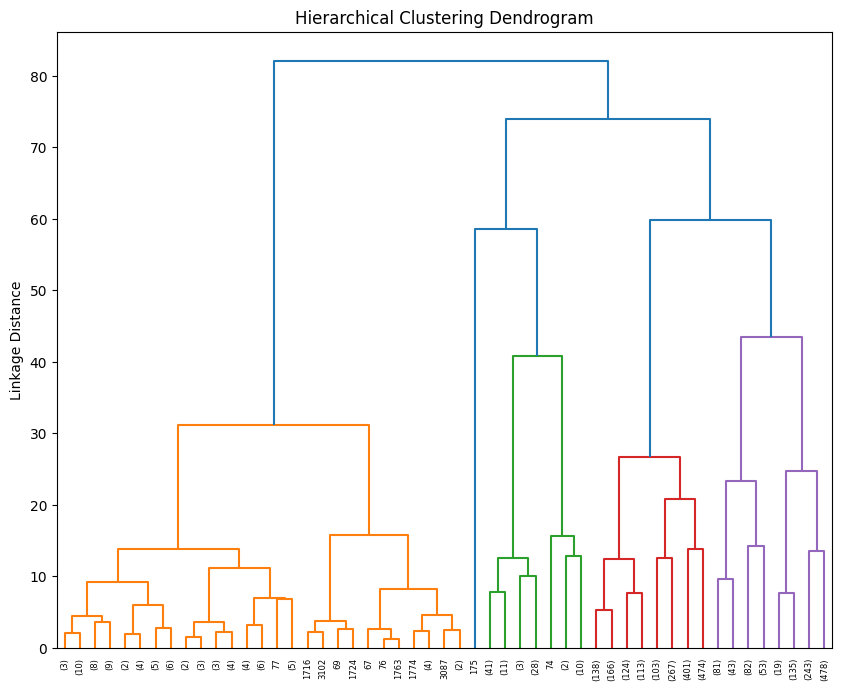

In [8]:
# Scale data
ej_scaled = scaler.fit_transform(eeip_data[["lowincome_indicator",
                                                  "utility_pv_technical_generation_potential_mwh",
                                                  "residential_pv_technical_generation_potential_mwh",
                                                  "land_based_wind_technical_generation_potential_mwh",
                                                  "commercial_pv_technical_generation_potential_mwh"]].dropna())

# Convert back to a DataFrame
ej_df = pd.DataFrame(ej_scaled, columns=["lowincome_indicator",
                                                     "utility_pv_technical_generation_potential_mwh",
                                                     "residential_pv_technical_generation_potential_mwh",
                                                     "land_based_wind_technical_generation_potential_mwh",
                                                     "commercial_pv_technical_generation_potential_mwh"]).reset_index(drop=True)

# Hierarchical clustering
linkage_df = linkage(ej_df, 'ward')

# Viz dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linkage_df, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.ylabel("Linkage Distance")
plt.xlabel("")
plt.show()

         lowincome_indicator  utility_pv_technical_generation_potential_mwh  \
cluster                                                                       
1                   0.133245                                       4.264780   
2                  -0.561355                                      -0.084686   
3                  -0.594662                                      -0.196049   
4                   0.974009                                      -0.022461   

         residential_pv_technical_generation_potential_mwh  \
cluster                                                      
1                                                -0.121334   
2                                                 3.836926   
3                                                -0.044316   
4                                                -0.248778   

         land_based_wind_technical_generation_potential_mwh  \
cluster                                                       
1                         

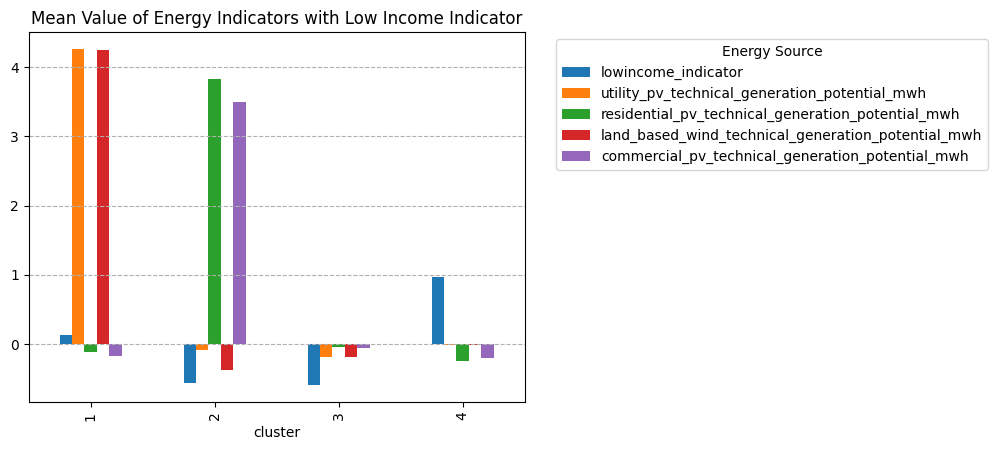

In [11]:
# num of clusters (4?)
num_ej = 4

# cluster assignments
cluster_labels_ej = fcluster(Z=linkage_df, t=num_ej, criterion='maxclust') 

# Add a new column `cluster` 
ej_df['cluster'] = cluster_labels_ej

# Mean values of the energy potential features for each cluster
ej_energy_means = ej_df.groupby(['cluster']).mean()
print(ej_energy_means)

# Grouped bar chart viz
ej_energy_means.reset_index().plot(x='cluster', 
                                   kind='bar', 
                                   stacked=False, 
                                   title='Mean Value of Energy Indicators with Low Income Indicator') 
plt.legend(title = "Energy Source", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis = "y", linestyle = "--")

intepreting results: It looks like cluster one has the most energy potential total with a large majority in utility and land based wind. The low income is above 0, although still low. Cluster two has very high utility and commercial energy potential, but also has a negative low income indicator. This may make sense, if we consider that commercial and residential potential relies more heavily on residents with higher incomes than utility and land based wind potential (which in theory are independent of residential status in the area). Cluster three has a low income indicator value but also negative/zero potential in all energy sectors. Cluster four has the highest low income indicator of all the clusters, and all the energy is at zero or negative values. Residential and commercial is the most negative out of all the clusters, which makes sense with my earlier logic. Policy recommendations may follow something such as investing in energy potential in low income counties or enacting land based wind or utility energy in those neighborhoods if the main goal is energy production in all counties. 

Which EJSCREEN variable(s) did you add to the analysis? Why did you choose these?  What is the question you are interested in? What did you learn from the analysis

I added the low income indicator into the analysis. I chose this because all variables probably affect/are effected by income (ie. education level is effected by income and then education level affects income). The question I am most interested in is how energy potential types differ between low income indicator values. I learned that land based wind and utility potential is higher in low income areas and residential and commercial energy potentials are higher in higher income areas. 